In [1]:
#导入需要的模块包
import pandas as pd

# 读取原始数据集

In [ ]:

df = pd.read_csv('XXX县全县数据.csv')

#更新列名
df.columns = ['客户编号', '客户名称', '用电地址', '用电类别', '行业类别','ID','时间','正向有功电量','峰电量','平电量','谷电量']


In [78]:
#日期列转换成datetime类型
df['时间'] = pd.to_datetime(df['时间']) 

In [80]:
#拆分年、月、日
df_year=df['时间'].apply(lambda x: x.year)
df_month=df['时间'].apply(lambda x: x.month)
df_day=df['时间'].apply(lambda x: x.day)

#拼接新的年月日三列到原表
df = pd.concat([df, df_year,df_month,df_day], axis=1)

In [81]:
df.columns = ['客户编号', '客户名称', '用电地址', '用电类别', '行业类别','ID','时间','正向有功电量','峰电量','平电量','谷电量','年','月','日']

In [88]:
#删除不需要的三列
df2=df.drop(['用电地址','ID','客户编号'],axis=1)

In [90]:
df2.to_csv('XXX县时间拆分后全县数据.csv')

# 拆分各行业数据集

通过“行业类别”字段，将行业类别分类标准归纳如下：
餐饮业包括：正餐服务|旅游饭店|其他餐饮业
住宿业包括：一般旅馆|其他住宿业
交通包括：道路运输辅助活动|公路旅客运输
娱乐及观光活动包括：博物馆|其他娱乐活动|群众文体活动|休闲观光活动|游览景区管理

In [20]:
#拆分餐饮业数据
df_catering=df[df['行业类别'].str.contains('正餐服务|旅游饭店|其他餐饮业')]
#输出餐饮业数据到excel
df_catering.to_excel('XXX县餐饮业数据.xlsx',index=False)

In [21]:
#拆分住宿业数据
df_accommodation=df[df['行业类别'].str.contains('一般旅馆|其他住宿业')]
#输出住宿业数据到excel
df_accommodation.to_excel('XXX县住宿业数据.xlsx',index=False)

In [22]:
#拆分交通数据
df_transportation=df[df['行业类别'].str.contains('道路运输辅助活动|公路旅客运输')]
#输出交通数据到excel
df_transportation.to_excel('XXX县交通数据.xlsx',index=False)

In [23]:
#拆分娱乐及观光活动数据
df_entertainment=df[df['行业类别'].str.contains('博物馆|其他娱乐活动|群众文体活动|休闲观光活动|游览景区管理')]
#输出娱乐及观光活动数据到excel
df_entertainment.to_excel('XXX县娱乐及观光活动数据.xlsx',index=False)

# 行业年用电量占比

大屏展示主界面的左上角饼图数据：餐饮业、住宿业、交通、旅游及观光活动

In [7]:
#餐饮业年用电量
df_catering=pd.read_excel('XXX县餐饮业数据.xlsx')
df_catering_year=df_catering.groupby(['年'])['正向有功电量'].sum()
df_catering_year

年
2018    3081472.17
2019    2740228.25
2020    3651817.96
Name: 正向有功电量, dtype: float64

In [29]:
#住宿业年用电量
df_accommodation=pd.read_excel('XXX县住宿业数据.xlsx')
df_accommodation=df_accommodation.groupby(['年'])['正向有功电量'].sum()
df_accommodation

年
2018     721441.00
2019     991029.65
2020    2058181.39
Name: 正向有功电量, dtype: float64

In [30]:
#交通年用电量
df_transportation=pd.read_excel('XXX县交通数据.xlsx')
df_transportation=df_transportation.groupby(['年'])['正向有功电量'].sum()
df_transportation

年
2018    187598.73
2019    250235.16
2020    320100.66
Name: 正向有功电量, dtype: float64

In [31]:
#娱乐及观光活动用电量
df_entertainment=pd.read_excel('XXX县娱乐及观光活动数据.xlsx')
df_entertainment=df_entertainment.groupby(['年'])['正向有功电量'].sum()
df_entertainment

年
2018    72028.18
2019    30788.11
2020    29062.47
Name: 正向有功电量, dtype: float64

# 行业用电量同环比

依据正向有功电量计算各行业用电量的同比、环比值，作为新的列插入进数据集。

In [74]:
##### 餐饮业 #####

#读取行业全部数据集
df_catering=pd.read_excel('XXX县餐饮业数据.xlsx')

#计算该行业每月用电量总和
df_catering_monthly=df_catering.groupby(['年','月'])['正向有功电量','峰电量'].sum()

#计算该行业用电量月环比值
df_catering_monthly["环比值"] = df_catering_monthly["正向有功电量"].pct_change(periods=1)

#删除无用列
df_catering_monthly=df_catering_monthly.drop(['峰电量'],axis=1)

#计算该行业用电量同比值
df_catering_monthly["同比值"] = df_catering_monthly["正向有功电量"].pct_change(periods=12)

#生成行业月度数据汇总、环比、同比表格
df_catering_monthly.to_excel('餐饮业月度数据.xlsx')

<ipython-input-74-11727ab75948>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_catering_monthly=df_catering.groupby(['年','月'])['正向有功电量','峰电量'].sum()


In [36]:
##### 住宿业 #####

#读取行业全部数据集
df_accommodation=pd.read_excel('XXX县住宿业数据.xlsx')

#计算该行业每月用电量总和
df_accommodation_monthly=df_accommodation.groupby(['年','月'])['正向有功电量','峰电量'].sum()

#计算该行业用电量月环比值
df_accommodation_monthly["环比值"] = df_accommodation_monthly["正向有功电量"].pct_change(periods=1)

#删除无用列
df_accommodation_monthly=df_accommodation_monthly.drop(['峰电量'],axis=1)

#计算该行业用电量同比值
df_accommodation_monthly["同比值"] = df_accommodation_monthly["正向有功电量"].pct_change(periods=12)

#生成行业月度数据汇总、环比、同比表格
df_accommodation_monthly.to_excel('住宿业月度数据.xlsx')

<ipython-input-36-830036bee7d7>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_accommodation_monthly=df_accommodation.groupby(['年','月'])['正向有功电量','峰电量'].sum()


In [37]:
##### 交通 #####

#读取行业全部数据集
df_transportation=pd.read_excel('XXX县交通数据.xlsx')

#计算该行业每月用电量总和
df_transportation_monthly=df_transportation.groupby(['年','月'])['正向有功电量','峰电量'].sum()

#计算该行业用电量月环比值
df_transportation_monthly["环比值"] = df_transportation_monthly["正向有功电量"].pct_change(periods=1)

#删除无用列
df_transportation_monthly=df_transportation_monthly.drop(['峰电量'],axis=1)

#计算该行业用电量同比值
df_transportation_monthly["同比值"] = df_transportation_monthly["正向有功电量"].pct_change(periods=12)

#生成行业月度数据汇总、环比、同比表格
df_transportation_monthly.to_excel('交通月度数据.xlsx')

<ipython-input-37-c261e951a302>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_transportation_monthly=df_transportation.groupby(['年','月'])['正向有功电量','峰电量'].sum()


In [38]:
##### 娱乐及观光活动 #####

#读取行业全部数据集
df_entertainment=pd.read_excel('XXX县娱乐及观光活动数据.xlsx')

#计算该行业每月用电量总和
df_entertainment_monthly=df_entertainment.groupby(['年','月'])['正向有功电量','峰电量'].sum()

#计算该行业用电量月环比值
df_entertainment_monthly["环比值"] = df_entertainment_monthly["正向有功电量"].pct_change(periods=1)

#删除无用列
df_entertainment_monthly=df_entertainment_monthly.drop(['峰电量'],axis=1)

#计算该行业用电量同比值
df_entertainment_monthly["同比值"] = df_entertainment_monthly["正向有功电量"].pct_change(periods=12)

#生成行业月度数据汇总、环比、同比表格
df_entertainment_monthly.to_excel('娱乐及观光活动月度数据.xlsx')

<ipython-input-38-300c98aaab3c>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_entertainment_monthly=df_entertainment.groupby(['年','月'])['正向有功电量','峰电量'].sum()


# 电力指数构建

一级下钻页面的年度电力指数计算模型

In [21]:
df=pd.read_csv('XXX县时间拆分后全县数据.csv')
#删除最左侧无用列
df=df.drop([df.columns[0]],axis=1) 

#计算该行业每月用电量总和
df=df.groupby(['年','月'])['正向有功电量','峰电量'].sum()

#计算该行业用电量月环比值
df["环比值"] = df["正向有功电量"].pct_change(periods=1)

#计算该行业用电量同比值
df["同比值"] = df["正向有功电量"].pct_change(periods=12)

#将索引拆分
df=df.reset_index()

#2019、2020电力指数
df_2019EI=df[df['年']==2019]['同比值'].mean()
print('2019年电力指数为：',round(df_2019EI,4))
df_2020EI=df[df['年']==2020]['同比值'].mean()
print('\n2020年电力指数为：',round(df_2020EI,4))

<ipython-input-21-b87eae13f44a>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df=df.groupby(['年','月'])['正向有功电量','峰电量'].sum()


2019年电力指数为： 0.2423

2020年电力指数为： 1.3017


# 经济指数构建

一级下钻页面的经济指数计算模型

In [28]:
df=pd.read_excel('【经济指标】居民每季度可支配收入.xlsx')

In [32]:
df_2019MI=df[df['年']==2019]['平均同比'].mean()
print('2019年经济指数为：',round(df_2019MI,4))
df_2020MI=df[df['年']==2020]['平均同比'].mean()
print('\n2020年经济指数为：',round(df_2020MI,4))

2019年经济指数为： 0.0875

2020年经济指数为： 0.0534


# 环境指数构建

一级下钻页面的环境指数计算模型

In [33]:
df=pd.read_excel('【环境指标】所有环境指标.xlsx')

In [35]:
df_2020HI=df['排名同比指数'].mean()
print('\n2020年经济指数为：',round(df_2020HI,4))


2020年经济指数为： -0.053


# 人口指数构建

一级下钻页面的人口指数计算模型

In [36]:
df=pd.read_excel('【人口指标】.xlsx')

In [37]:
df

,年份,全县常住人口（万人）,户籍人口数（万人）,城镇人口（万人）,人口自然增长率,人口出生率,人口死亡率,0-14岁人口比例,15-64岁人口比例,65岁及以上人口比例
0,2013,13.72,16.02,3.811416,0.00773,0.01479,0.00706,0.2100,0.7160,0.0740
1,2014,13.79,15.47,3.881885,0.00788,0.01496,0.00708,0.2080,0.7180,0.0740
2,2015,13.89,15.73,4.222560,0.00738,0.01436,0.00698,0.2136,0.6662,0.1203
3,2016,13.99,15.91,4.510376,0.00693,0.01408,0.00716,0.2070,0.7050,0.0880
4,2017,14.10,15.96,4.910000,0.00737,0.01454,0.00717,0.2060,0.7050,0.0890
5,2018,14.18,16.12,5.110000,0.00700,0.01425,0.00725,0.2070,0.7000,0.0930
6,2019,14.23,16.12,5.270000,0.00697,0.01420,0.00723,0.2040,0.7000,0.0920


# 景点评论文本分析

在马蜂窝、携程使用“后裔采集器”进行景点评论爬虫提取文本数据，进行高频词抓取，并且生成词云图

In [25]:
pip install jieba

  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314482 sha256=4abf2c50891685eaa002990dc8ab85553830ab5d5dbdcd02b01a8475ce0d5f26
  Stored in directory: c:\users\35453\appdata\local\pip\cache\wheels\ca\38\d8\dfdfe73bec1d12026b30cb7ce8da650f3f0ea2cf155ea018ae
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
import jieba
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import os,sys


In [29]:
df=pd.read_excel('马蜂窝—冶力关评论.xlsx')

In [30]:
df=df[['rev-txt']]

In [31]:
#将所有评论转为列表内的字符串
comments=df['rev-txt'].tolist()

In [52]:
#将每一条评论拆分成一个一个字符串词语组成的列表
word_list=[]
for i in range(len(comments)):
    X=list(jieba.cut(comments[i], cut_all=False))
    word_list.append(X)

In [55]:
# 文本清洗 获得干净文本
pure_text = []
for each_comments in word_list:
    for each_word in each_comments:
        if len(each_word)>1 and each_word != "\n\r":
            if not each_word.isdigit():  #去数字
                pure_text.append(each_word.strip())


In [57]:
import numpy as np
content = pd.DataFrame(pure_text, columns=['word'])

In [59]:
content_new = content.groupby('word').agg(计数=pd.NamedAgg(column='word', aggfunc='size')).reset_index().sort_values(
    by='word', ascending=False)

In [75]:
content_new.sort_values(by=['计数'],ascending=False).head(10)

,word,计数
120,冶力关,19
331,景区,14
119,冶力,11
48,不错,11
102,兰州,10
195,地方,9
67,临潭县,8
536,这里,8
416,甘南,7
368,比较,7


In [71]:
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文标签
plt.rcParams['axes.unicode_minus']=False    #显示负号

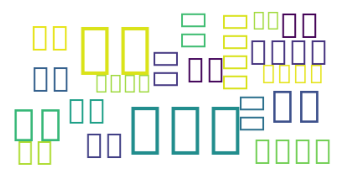

In [73]:
wordcloud = WordCloud(background_color='white', max_font_size=80)

word_frequence = {x[0]:x[1] for x in content_new.head(20).values}

wordcloud = wordcloud.fit_words(word_frequence)

# 展示图片
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
